<a href="https://colab.research.google.com/github/rajeevan094/machinelearnig/blob/main/expno2/scenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("bottle.csv", low_memory=False)

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88269 entries, 0 to 88268
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cst_Cnt              88269 non-null  int64  
 1   Btl_Cnt              88269 non-null  int64  
 2   Sta_ID               88269 non-null  object 
 3   Depth_ID             88269 non-null  object 
 4   Depthm               88269 non-null  int64  
 5   T_degC               87461 non-null  float64
 6   Salnty               70639 non-null  float64
 7   O2ml_L               78876 non-null  float64
 8   STheta               70306 non-null  float64
 9   O2Sat                64752 non-null  float64
 10  Oxy_µmol/Kg          64752 non-null  float64
 11  BtlNum               0 non-null      float64
 12  RecInd               88269 non-null  int64  
 13  T_prec               87461 non-null  float64
 14  T_qual               992 non-null    float64
 15  S_prec               70639 non-null 

In [4]:
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

df = df[features + [target]]
df.head()

,Depthm,Salnty,O2ml_L,T_degC
0,0,33.440,NaN,10.50
1,8,33.440,NaN,10.46
2,10,33.437,NaN,10.46
3,19,33.420,NaN,10.45
4,20,33.421,NaN,10.45


In [5]:
# Check missing values
print(df.isnull().sum())

# Replace with median
df.fillna(df.median(), inplace=True)


Depthm        0
Salnty    17630
O2ml_L     9393
T_degC      808
dtype: int64


/tmp/ipython-input-2424620709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.median(), inplace=True)


In [6]:
X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)


In [10]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 5.301619864882595


In [11]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 2.30252467193787


In [12]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.7295590516774171


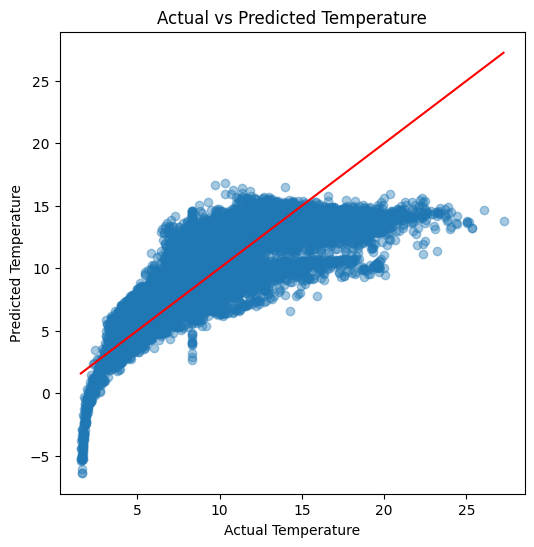

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.show()


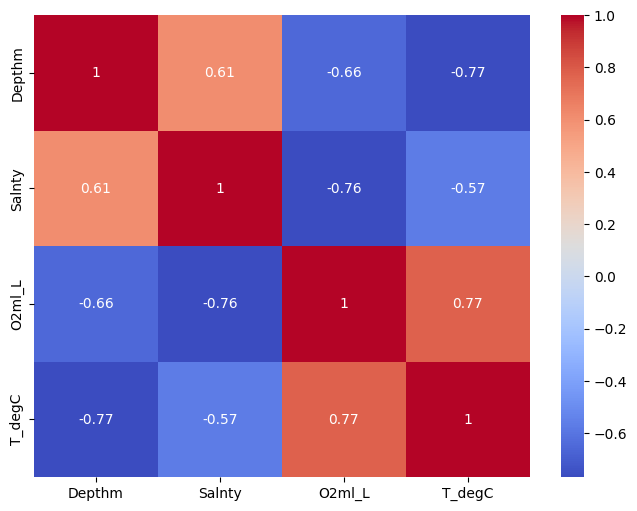

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [15]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Ridge R²: 0.7295592624650531


In [16]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso R²:", r2_score(y_test, y_pred_lasso))


Lasso R²: 0.7296069852478075


In [17]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})

print(coef_df.sort_values(by="Coefficient", ascending=False))


  Feature  Coefficient
2  O2ml_L     2.580792
1  Salnty     0.753932
0  Depthm    -2.190415
